In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import time
import seaborn as sns
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'seaborn'

## Transaction From 20241201 To 20250104

In [2]:
df = pd.read_excel('../dataset/BizPlay-2025_JAN.xlsx', sheet_name='2025년1월 거래데이터')
df

,Transaction Date,Transaction Time,Transaction Amount,Customer Date of Birth,Customer Gender,Customer Age,Customer Region (City/County/District),Merchant Region (City/County/District),Merchant ID,Sub-Merchant ID,Transaction Processing Agency (VAN),Distance
0,20250101,225951,30500,140929,4,10,41133,ONLINE,F000000001,S220106718,52,0
1,20250101,225950,15500,90921,4,15,41220,41220,F000000018,00917255276,55,0
2,20250101,225936,10500,80912,3,16,41150,41150,F000000018,00913070265,55,0
3,20250101,225917,5800,91111,3,15,41430,41430,F000000018,00912455517,55,0
4,20250101,225904,5000,110224,3,14,41360,41360,F000000018,00919265356,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...
323456,20250131,61432,15580,151031,4,9,41670,41670,F000000018,00922577359,55,0
323457,20250131,60746,6050,71023,3,17,41273,41273,F000000018,00921032828,55,0
323458,20250131,60728,31900,70504,3,17,41173,ONLINE,F000000001,S230127579,52,0
323459,20250131,60711,10300,110420,3,14,41173,41173,F000000018,00979351269,55,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387116 entries, 0 to 387115
Data columns (total 14 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Transaction Date                        387116 non-null  int64  
 1   Transaction Time                        387116 non-null  int64  
 2   Transaction Amount                      387116 non-null  int64  
 3   Customer Date of Birth                  387116 non-null  int64  
 4   Customer Gender                         387116 non-null  int64  
 5   Customer Age                            387116 non-null  int64  
 6   고객 주간 지원내용                              387116 non-null  object 
 7   Customer Region (City/County/District)  385954 non-null  object 
 8   Merchant Region (City/County/District)  387116 non-null  object 
 9   Merchant ID                             387116 non-null  object 
 10  Sub-Merchant ID                         2955

In [88]:
df = df.drop(columns=['Abnormal (0: normal, 1:abnormal)', '고객 주간 지원내용'])
df.head()

,Transaction Date,Transaction Time,Transaction Amount,Customer Date of Birth,Customer Gender,Customer Age,Customer Region (City/County/District),Merchant Region (City/County/District),Merchant ID,Sub-Merchant ID,Transaction Processing Agency (VAN),Distance
0,20241201,231124,-38500,70613,3,17,41480,ONLINE,F000000001,NaN,52.0,0.0
1,20241201,225957,-24900,60616,3,18,41271,ONLINE,F000000001,NaN,52.0,0.0
2,20241201,225944,35000,100216,3,15,41550,ONLINE,F000000001,S210024951,52.0,0.0
3,20241201,225937,24900,60616,3,18,41271,ONLINE,F000000001,NaN,52.0,0.0
4,20241201,225935,2500,71026,4,17,41273,41273,F000000018,00914917068,55.0,0.0


In [89]:
df.isnull().sum()

Transaction Date                              0
Transaction Time                              0
Transaction Amount                            0
Customer Date of Birth                        0
Customer Gender                               0
Customer Age                                  0
Customer Region (City/County/District)     1162
Merchant Region (City/County/District)        0
Merchant ID                                   0
Sub-Merchant ID                           91548
Transaction Processing Agency (VAN)       87116
Distance                                  87116
dtype: int64

In [90]:
#  Return the number of unique values
df.nunique() 

Transaction Date                             35
Transaction Time                          55422
Transaction Amount                         4956
Customer Date of Birth                     5257
Customer Gender                            4503
Customer Age                                 26
Customer Region (City/County/District)    27749
Merchant Region (City/County/District)       64
Merchant ID                                  70
Sub-Merchant ID                           50462
Transaction Processing Agency (VAN)           4
Distance                                     85
dtype: int64

In [91]:
# List all column name and distinct values in a column
distinct_values = {i: df[i].unique() for i in df.columns}
distinct_values

{'Transaction Date': array([20241201, 20241202, 20241203, 20241204, 20241205, 20241206,
        20241207, 20241208, 20241209, 20241210, 20241211, 20241212,
        20241213, 20241214, 20241215, 20241216, 20241217, 20241218,
        20241219, 20241220, 20241221, 20241222, 20241223, 20241224,
        20241225, 20241226, 20241227, 20241228, 20241229, 20241230,
        20241231, 20250101, 20250102, 20250103, 20250104]),
 'Transaction Time': array([231124, 225957, 225944, ..., 194442, 153611, 150044],
       shape=(55422,)),
 'Transaction Amount': array([-38500, -24900,  35000, ...,  29501,  -8250,  14023], shape=(4956,)),
 'Customer Date of Birth': array([     70613,      60616,     100216, ..., 4155040000, 4121059000,
        4111370000], shape=(5257,)),
 'Customer Gender': array([     3,      4,      7, ..., 181201, 190112, 120112], shape=(4503,)),
 'Customer Age': array([ 17,  18,  15,  19,   7,  16,  14,   9,   8,  13,   5,  12,  20,
         10,  11,   2,   3,   6,   4,   1,  21,  22,

## Data Preprocessing

In [92]:
df.columns

Index(['Transaction Date', 'Transaction Time', 'Transaction Amount',
       'Customer Date of Birth', 'Customer Gender', 'Customer Age',
       'Customer Region (City/County/District)',
       'Merchant Region (City/County/District)', 'Merchant ID',
       'Sub-Merchant ID', 'Transaction Processing Agency (VAN)', 'Distance'],
      dtype='object')

### Check Transaction Time Column 

In [93]:
# Find the transaction time that is not between 000000 and 235959
df['Transaction Time'].where((df['Transaction Time'] >= 0) & (df['Transaction Time'] <= 235959), 0)

0         231124
1         225957
2         225944
3         225937
4         225935
           ...  
387111     60704
387112     60347
387113     60205
387114     60158
387115     60130
Name: Transaction Time, Length: 387116, dtype: int64

### Customer Date of Birth

In [94]:
# Get the value beside the format of YYMMDD pattern from 'Customer Date of Birth' column
invalid_dob_format = ~df['Customer Date of Birth'].astype(str).str.match(r'\d{1,2}(0[1-9]|1[0-2])(0[1-9]|[12]\d|3[01])(?!\d)')
invalid_dob_format

0         False
1         False
2         False
3         False
4         False
          ...  
387111     True
387112     True
387113     True
387114     True
387115     True
Name: Customer Date of Birth, Length: 387116, dtype: bool

### Customer Gender

In [95]:
invalid_gender = ~df['Customer Gender'].astype(str).isin(['3', '4', '7', '8'])
invalid_gender

0         False
1         False
2         False
3         False
4         False
          ...  
387111     True
387112     True
387113     True
387114     True
387115     True
Name: Customer Gender, Length: 387116, dtype: bool

### Customer Age

In [96]:
df['Customer Age'].unique()

array([ 17,  18,  15,  19,   7,  16,  14,   9,   8,  13,   5,  12,  20,
        10,  11,   2,   3,   6,   4,   1,  21,  22,  23,   0, -60, -58])

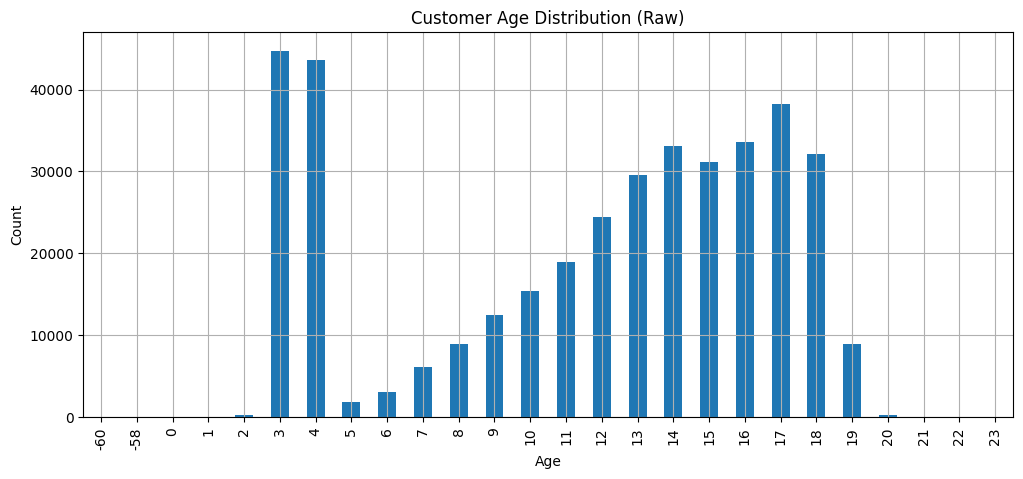

In [97]:
# Plot Bar Plot  for 'Customer Age'
df['Customer Age'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5))
plt.title('Customer Age Distribution (Raw)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Cleaning the invalid dob & gender format by removing the row

In [98]:
invalid_condition = invalid_dob_format & invalid_gender
invalid_condition

0         False
1         False
2         False
3         False
4         False
          ...  
387111     True
387112     True
387113     True
387114     True
387115     True
Length: 387116, dtype: bool

In [99]:
invalid_condition.sum()

np.int64(87116)

In [100]:
df_cleaned = df[~invalid_condition]  # Keep only rows that are NOT invalid
df_cleaned

,Transaction Date,Transaction Time,Transaction Amount,Customer Date of Birth,Customer Gender,Customer Age,Customer Region (City/County/District),Merchant Region (City/County/District),Merchant ID,Sub-Merchant ID,Transaction Processing Agency (VAN),Distance
0,20241201,231124,-38500,70613,3,17,41480,ONLINE,F000000001,NaN,52.0,0.0
1,20241201,225957,-24900,60616,3,18,41271,ONLINE,F000000001,NaN,52.0,0.0
2,20241201,225944,35000,100216,3,15,41550,ONLINE,F000000001,S210024951,52.0,0.0
3,20241201,225937,24900,60616,3,18,41271,ONLINE,F000000001,NaN,52.0,0.0
4,20241201,225935,2500,71026,4,17,41273,41273,F000000018,00914917068,55.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,20250104,143644,16310,120328,3,13,41192,41192,F000000018,00908646987,55.0,0.0
299996,20250104,143643,34500,100917,4,14,41196,41192,F000000018,00918844631,55.0,0.0
299997,20250104,143642,20700,160318,4,9,41220,41220,F000000018,00909416985,55.0,0.0
299998,20250104,143638,14700,101108,3,14,41150,41150,F000000018,00920169142,55.0,0.0


In [ ]:
df_cleaned.isnull().sum()

Transaction Date                             0
Transaction Time                             0
Transaction Amount                           0
Customer Date of Birth                       0
Customer Gender                              0
Customer Age                                 0
Customer Region (City/County/District)       0
Merchant Region (City/County/District)       0
Merchant ID                                  0
Sub-Merchant ID                           4432
Transaction Processing Agency (VAN)          0
Distance                                     0
dtype: int64

### Fill empty Sub-Merchant ID with 0

In [102]:
df_cleaned['Sub-Merchant ID'] = df_cleaned['Sub-Merchant ID'].fillna(0)
df_cleaned

/tmp/ipykernel_607374/2791137465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sub-Merchant ID'] = df_cleaned['Sub-Merchant ID'].fillna(0)


,Transaction Date,Transaction Time,Transaction Amount,Customer Date of Birth,Customer Gender,Customer Age,Customer Region (City/County/District),Merchant Region (City/County/District),Merchant ID,Sub-Merchant ID,Transaction Processing Agency (VAN),Distance
0,20241201,231124,-38500,70613,3,17,41480,ONLINE,F000000001,0,52.0,0.0
1,20241201,225957,-24900,60616,3,18,41271,ONLINE,F000000001,0,52.0,0.0
2,20241201,225944,35000,100216,3,15,41550,ONLINE,F000000001,S210024951,52.0,0.0
3,20241201,225937,24900,60616,3,18,41271,ONLINE,F000000001,0,52.0,0.0
4,20241201,225935,2500,71026,4,17,41273,41273,F000000018,00914917068,55.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,20250104,143644,16310,120328,3,13,41192,41192,F000000018,00908646987,55.0,0.0
299996,20250104,143643,34500,100917,4,14,41196,41192,F000000018,00918844631,55.0,0.0
299997,20250104,143642,20700,160318,4,9,41220,41220,F000000018,00909416985,55.0,0.0
299998,20250104,143638,14700,101108,3,14,41150,41150,F000000018,00920169142,55.0,0.0


In [103]:
df_cleaned.isnull().sum()

Transaction Date                          0
Transaction Time                          0
Transaction Amount                        0
Customer Date of Birth                    0
Customer Gender                           0
Customer Age                              0
Customer Region (City/County/District)    0
Merchant Region (City/County/District)    0
Merchant ID                               0
Sub-Merchant ID                           0
Transaction Processing Agency (VAN)       0
Distance                                  0
dtype: int64

### Use Your Rules to Label Pseudo-Anomalies

Add Anomaly with default value of '0'

In [ ]:
outside_district = (
    (df_cleaned['Customer Region (City/County/District)'] != df_cleaned['Merchant Region (City/County/District)']) &
    (df_cleaned['Merchant Region (City/County/District)'] != 'ONLINE')
)
outside_district.sum()  # This tells you how many True rows



np.int64(27079)

In [105]:
df_cleaned['anomaly'] = 0
df_cleaned.loc[outside_district, 'anomaly'] = 1

print("Outside district count:", outside_district.sum())
print("Anomaly values:", df_cleaned['anomaly'].value_counts())

Outside district count: 27079
Anomaly values: anomaly
0    272921
1     27079
Name: count, dtype: int64


/tmp/ipykernel_607374/4030397301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['anomaly'] = 0


In [106]:
df_cleaned['anomaly'].value_counts()

anomaly
0    272921
1     27079
Name: count, dtype: int64

In [107]:
df_cleaned['Transaction Time'] = df_cleaned['Transaction Time'].astype(str).str.zfill(6)

/tmp/ipykernel_607374/4262531283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Transaction Time'] = df_cleaned['Transaction Time'].astype(str).str.zfill(6)


In [108]:
parsed_time = pd.to_datetime(df_cleaned['Transaction Time'], format='%H%M%S').dt.time
rule_kids_after_10pm = (df_cleaned['Customer Age'] < 8) & (parsed_time >= time(22, 0))
df_cleaned.loc[rule_kids_after_10pm, 'anomaly'] = 1

In [109]:
df_cleaned['anomaly'].value_counts()

anomaly
0    272613
1     27387
Name: count, dtype: int64

In [110]:
df_cleaned


,Transaction Date,Transaction Time,Transaction Amount,Customer Date of Birth,Customer Gender,Customer Age,Customer Region (City/County/District),Merchant Region (City/County/District),Merchant ID,Sub-Merchant ID,Transaction Processing Agency (VAN),Distance,anomaly
0,20241201,231124,-38500,70613,3,17,41480,ONLINE,F000000001,0,52.0,0.0,0
1,20241201,225957,-24900,60616,3,18,41271,ONLINE,F000000001,0,52.0,0.0,0
2,20241201,225944,35000,100216,3,15,41550,ONLINE,F000000001,S210024951,52.0,0.0,0
3,20241201,225937,24900,60616,3,18,41271,ONLINE,F000000001,0,52.0,0.0,0
4,20241201,225935,2500,71026,4,17,41273,41273,F000000018,00914917068,55.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,20250104,143644,16310,120328,3,13,41192,41192,F000000018,00908646987,55.0,0.0,0
299996,20250104,143643,34500,100917,4,14,41196,41192,F000000018,00918844631,55.0,0.0,1
299997,20250104,143642,20700,160318,4,9,41220,41220,F000000018,00909416985,55.0,0.0,0
299998,20250104,143638,14700,101108,3,14,41150,41150,F000000018,00920169142,55.0,0.0,0


In [111]:
late_night_mask = (parsed_time >= time(23, 0)) | (parsed_time < time(6, 0))
df_cleaned.loc[late_night_mask, 'anomaly'] = 1

In [112]:
df_cleaned['anomaly'].value_counts()

anomaly
0    272603
1     27397
Name: count, dtype: int64

In [113]:
financial_aid_recipients_during_school_term = (parsed_time >= time(11, 0)) & (parsed_time < time(13, 0))
df_cleaned.loc[financial_aid_recipients_during_school_term, 'anomaly'] = 1

In [114]:
df_cleaned['anomaly'].value_counts()

anomaly
0    247227
1     52773
Name: count, dtype: int64

In [115]:
df_cleaned

,Transaction Date,Transaction Time,Transaction Amount,Customer Date of Birth,Customer Gender,Customer Age,Customer Region (City/County/District),Merchant Region (City/County/District),Merchant ID,Sub-Merchant ID,Transaction Processing Agency (VAN),Distance,anomaly
0,20241201,231124,-38500,70613,3,17,41480,ONLINE,F000000001,0,52.0,0.0,1
1,20241201,225957,-24900,60616,3,18,41271,ONLINE,F000000001,0,52.0,0.0,0
2,20241201,225944,35000,100216,3,15,41550,ONLINE,F000000001,S210024951,52.0,0.0,0
3,20241201,225937,24900,60616,3,18,41271,ONLINE,F000000001,0,52.0,0.0,0
4,20241201,225935,2500,71026,4,17,41273,41273,F000000018,00914917068,55.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,20250104,143644,16310,120328,3,13,41192,41192,F000000018,00908646987,55.0,0.0,0
299996,20250104,143643,34500,100917,4,14,41196,41192,F000000018,00918844631,55.0,0.0,1
299997,20250104,143642,20700,160318,4,9,41220,41220,F000000018,00909416985,55.0,0.0,0
299998,20250104,143638,14700,101108,3,14,41150,41150,F000000018,00920169142,55.0,0.0,0


### Feature Engineering

In [116]:
df_cleaned.nunique()


Transaction Date                             35
Transaction Time                          55422
Transaction Amount                         4956
Customer Date of Birth                     4701
Customer Gender                               4
Customer Age                                 26
Customer Region (City/County/District)       43
Merchant Region (City/County/District)       61
Merchant ID                                   5
Sub-Merchant ID                           50463
Transaction Processing Agency (VAN)           4
Distance                                     85
anomaly                                       2
dtype: int64

In [117]:
df_cleaned['Transaction Time'] = df_cleaned['Transaction Time'].astype(str).str.zfill(6)
parsed_time = pd.to_datetime(df_cleaned['Transaction Time'], format='%H%M%S')
# df_cleaned['hour'] = parsed_time.dt.hour
# df_cleaned['minute'] = parsed_time.dt.minute
# df_cleaned['second'] = parsed_time.dt.second


/tmp/ipykernel_607374/2689039040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Transaction Time'] = df_cleaned['Transaction Time'].astype(str).str.zfill(6)


In [118]:
scaler = StandardScaler()
df_cleaned['Distance'] = scaler.fit_transform(df_cleaned[['Distance']])


/tmp/ipykernel_607374/3925420859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Distance'] = scaler.fit_transform(df_cleaned[['Distance']])


In [119]:
from sklearn.preprocessing import LabelEncoder

for col in ['Customer Gender', 'Customer Region (City/County/District)',
            'Merchant Region (City/County/District)', 'Merchant ID', 'Sub-Merchant ID',
            'Transaction Processing Agency (VAN)']:
    df_cleaned[col] = LabelEncoder().fit_transform(df_cleaned[col].astype(str))


/tmp/ipykernel_607374/3164850950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = LabelEncoder().fit_transform(df_cleaned[col].astype(str))
/tmp/ipykernel_607374/3164850950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = LabelEncoder().fit_transform(df_cleaned[col].astype(str))
/tmp/ipykernel_607374/3164850950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [120]:
df_cleaned['Customer Age'].value_counts()

Customer Age
 17    38215
 16    33617
 14    33123
 18    32165
 15    31108
 13    29612
 12    24404
 11    18915
 10    15421
 9     12463
 19     8999
 8      8911
 7      6123
 6      3066
 5      1870
 4       907
 3       370
 2       274
 20      267
 21       75
 1        34
 23       19
 22       17
-58       11
 0         9
-60        5
Name: count, dtype: int64

In [127]:
# First, pad Customer DOB with zeros to 6 digits if needed
df_cleaned['Customer Date of Birth'] = df_cleaned['Customer Date of Birth'].astype(str).str.zfill(6)

# Now fix the DOB manually for cases where year is < 30 → 2000+, else 1900+
def correct_dob(dob_str):
    if pd.isna(dob_str):
        return pd.NaT
    year = int(dob_str[:2])
    if year <= 30:
        dob_fixed = '20' + dob_str
    else:
        dob_fixed = '19' + dob_str
    return pd.to_datetime(dob_fixed, format='%Y%m%d', errors='coerce')

# Apply the correction
df_cleaned['Customer Date of Birth'] = df_cleaned['Customer Date of Birth'].apply(correct_dob)



/tmp/ipykernel_607374/3855818156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Customer Date of Birth'] = df_cleaned['Customer Date of Birth'].astype(str).str.zfill(6)
/tmp/ipykernel_607374/3855818156.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Customer Date of Birth'] = df_cleaned['Customer Date of Birth'].apply(correct_dob)


In [136]:
df_cleaned_transaction_date = pd.to_datetime(df_cleaned['Transaction Date'], format='%Y%m%d')
invalid_age_rows = df_cleaned[df_cleaned['Customer Age'].isin([-58, -60])]

print(df_cleaned_transaction_date)
print(df_cleaned['Customer Date of Birth'])


0        2024-12-01
1        2024-12-01
2        2024-12-01
3        2024-12-01
4        2024-12-01
            ...    
299995   2025-01-04
299996   2025-01-04
299997   2025-01-04
299998   2025-01-04
299999   2025-01-04
Name: Transaction Date, Length: 300000, dtype: datetime64[ns]
0        2007-06-13
1        2006-06-16
2        2010-02-16
3        2006-06-16
4        2007-10-26
            ...    
299995   2012-03-28
299996   2010-09-17
299997   2016-03-18
299998   2010-11-08
299999   2010-05-13
Name: Customer Date of Birth, Length: 300000, dtype: datetime64[ns]


In [133]:
# Force Transaction Date to datetime
df_cleaned['Transaction Date'] = pd.to_datetime(df_cleaned['Transaction Date'], format='%Y%m%d', errors='coerce')

# Force Customer DOB to datetime
df_cleaned['Customer Date of Birth'] = pd.to_datetime(df_cleaned['Customer Date of Birth'], format='%Y%m%d', errors='coerce')

df_cleaned['Customer Age'] = df_cleaned['Transaction Date'].dt.year - df_cleaned['Customer Date of Birth'].dt.year

/tmp/ipykernel_607374/1001728392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Transaction Date'] = pd.to_datetime(df_cleaned['Transaction Date'], format='%Y%m%d', errors='coerce')
/tmp/ipykernel_607374/1001728392.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Customer Date of Birth'] = pd.to_datetime(df_cleaned['Customer Date of Birth'], format='%Y%m%d', errors='coerce')
/tmp/ipykernel_607374/1001728392.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [138]:
df_cleaned['Customer Age'].value_counts()

Customer Age
17    38192
16    33254
14    32826
15    32471
18    30894
13    30850
12    25213
11    19779
10    15682
9     12902
8      9595
7      6717
19     4065
6      3240
5      2110
4      1147
3       474
2       206
20      195
1        92
21       41
22       26
42       11
0         8
23        5
40        5
Name: count, dtype: int64

In [139]:
df_cleaned

,Transaction Date,Transaction Time,Transaction Amount,Customer Date of Birth,Customer Gender,Customer Age,Customer Region (City/County/District),Merchant Region (City/County/District),Merchant ID,Sub-Merchant ID,Transaction Processing Agency (VAN),Distance,anomaly
0,2024-12-01,231124,-38500,2007-06-13,0,17,32,60,0,0,2,-0.285519,1
1,2024-12-01,225957,-24900,2006-06-16,0,18,16,60,0,0,2,-0.285519,0
2,2024-12-01,225944,35000,2010-02-16,0,14,34,60,0,43510,2,-0.285519,0
3,2024-12-01,225937,24900,2006-06-16,0,18,16,60,0,0,2,-0.285519,0
4,2024-12-01,225935,2500,2007-10-26,1,17,17,27,1,14414,3,-0.285519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2025-01-04,143644,16310,2012-03-28,0,13,10,20,1,6981,3,-0.285519,0
299996,2025-01-04,143643,34500,2010-09-17,1,15,12,20,1,20610,3,-0.285519,1
299997,2025-01-04,143642,20700,2016-03-18,1,9,14,24,1,7793,3,-0.285519,0
299998,2025-01-04,143638,14700,2010-11-08,0,15,7,17,1,23010,3,-0.285519,0


In [3]:
df.to_csv("../dataset/cleaned_dataset.csv", index=False)